>  # **SMS OR EMAIL SPAM CLASSIICATION BY USING NLP**

![SPAM](https://camo.githubusercontent.com/231fa52b44adb8e718956a5a3425466a1ceb9c9c234df22fba77f0410b4b30e0/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313430302f302a6d624642506350554a442d35337633682e706e67)

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
df = pd.read_csv('./spam.csv',encoding='latin-1',index_col=False)


In [12]:
more = pd.read_csv('./train.csv',encoding='latin-1',index_col=False)

In [13]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2792,ham,Not from this campus. Are you in the library?,NaN,NaN,NaN
4385,ham,", im .. On the snowboarding trip. I was wonder...",NaN,NaN,NaN
4162,ham,I told that am coming on wednesday.,NaN,NaN,NaN
2880,ham,Printer is cool. I mean groovy. Wine is groovying,NaN,NaN,NaN
3910,ham,How i noe... She's in da car now... Later then...,NaN,NaN,NaN
5497,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
3879,ham,Hi juan. Im coming home on fri hey. Of course ...,NaN,NaN,NaN
4713,ham,Oops i thk i dun haf enuff... I go check then ...,NaN,NaN,NaN
5291,ham,Xy trying smth now. U eat already? We havent...,NaN,NaN,NaN
5381,spam,You have 1 new message. Call 0207-083-6089,NaN,NaN,NaN


In [14]:
more.sample(5)

,Unnamed: 0,target,text,Unnamed: 3
934,934,spam,"""Drive Away in Luxury  Enter Our Car Sweepsta...",NaN
956,956,spam,"""Document Details: Open Immediately""",NaN
572,572,spam,"""Exclusive offer for VIP members! Reply 'VIP' ...",NaN
450,450,spam,"""VIP membership invitation! Text 'VIP' for exc...",NaN
682,682,spam,"""Emergency alert: Your city is under traffic a...",NaN


# **1. Data Cleaning**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#Columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) have so much null value so we are going to drop these columns

In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [18]:
more.drop(columns=['Unnamed: 0','Unnamed: 3'],inplace=True)

In [19]:
df.sample(3)

,v1,v2
3550,ham,I love you both too :-)
3594,ham,Huh but i cant go 2 ur house empty handed right?
142,ham,A swt thought: \Nver get tired of doing little...


In [20]:
more.sample(3)

,target,text
845,spam,"""Free Trial: Test Drive Our Software for 30 Days"""
97,spam,"""Your Amazon order is on hold. Click the link ..."
44,spam,Earn $100 per hour from home! Reply 'EARN' for...


In [21]:
#Renaming the columns...
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2153,ham,I dont have i shall buy one dear
3935,ham,They r giving a second chance to rahul dengra.
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...
5096,ham,But i'm really really broke oh. No amount is t...
820,ham,Good afternoon starshine! How's my boytoy? Doe...


In [22]:
concatenated_df = pd.concat([df, more], axis=0, ignore_index=True)

In [23]:
df = concatenated_df

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
#Checking for misssing values...
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
#checking for duplicate...
df.duplicated().sum()

732

In [29]:
#Removing Duplicates.......
df = df.drop_duplicates(keep='first')

# **2. EDA And Feature Enge...**

In [30]:
df['target'].value_counts()

target
0    4516
1    1311
Name: count, dtype: int64

In [31]:
#Data is imbalanced so we have to take care of this 

In [32]:
from matplotlib import pyplot as plt

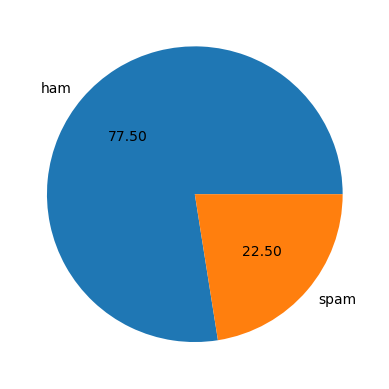

In [33]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
import nltk

In [35]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
#Creating new Feature (num_of_Character)

In [37]:
df['num_of_character'] = df['text'].apply(len)

C:\Users\anshu\AppData\Local\Temp\ipykernel_26716\868707299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_character'] = df['text'].apply(len)


In [38]:
#Creating new feature (num of words)

In [39]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\anshu\AppData\Local\Temp\ipykernel_26716\3973056924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [40]:
#Creating new feature (num_sentences)

In [41]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\anshu\AppData\Local\Temp\ipykernel_26716\2446049213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [42]:
df[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5827.000000,5827.000000,5827.000000
mean,77.939592,17.993307,1.937875
std,55.197188,12.667449,1.378661
min,2.000000,1.000000,1.000000
25%,38.000000,9.000000,1.000000
50%,63.000000,15.000000,2.000000
75%,106.500000,24.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#Analysis where target == 0 i.e. ham......
df[df['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### As we see by above result ham sms is when....
* mean(num_of_character) is approx 70
* mean(num_word) is approx 16
* mean(num_sentence) is approx 2

In [44]:
#Analysis where target == 1 i.e. spam...
df[df['target'] == 1][['num_of_character','num_word','num_sentence']].describe() 

,num_of_character,num_word,num_sentence
count,1311.000000,1311.000000,1311.000000
mean,103.707094,20.988558,2.343249
std,41.776738,8.630004,1.281560
min,13.000000,2.000000,1.000000
25%,72.000000,14.000000,1.000000
50%,89.000000,18.000000,2.000000
75%,148.500000,29.000000,3.000000
max,224.000000,46.000000,9.000000


### As we see by above result spam sms is when....
* mean(num_of_character) is greater than 100
* mean(num_word) is greater than 20
* mean(num_sentence) is approx 2

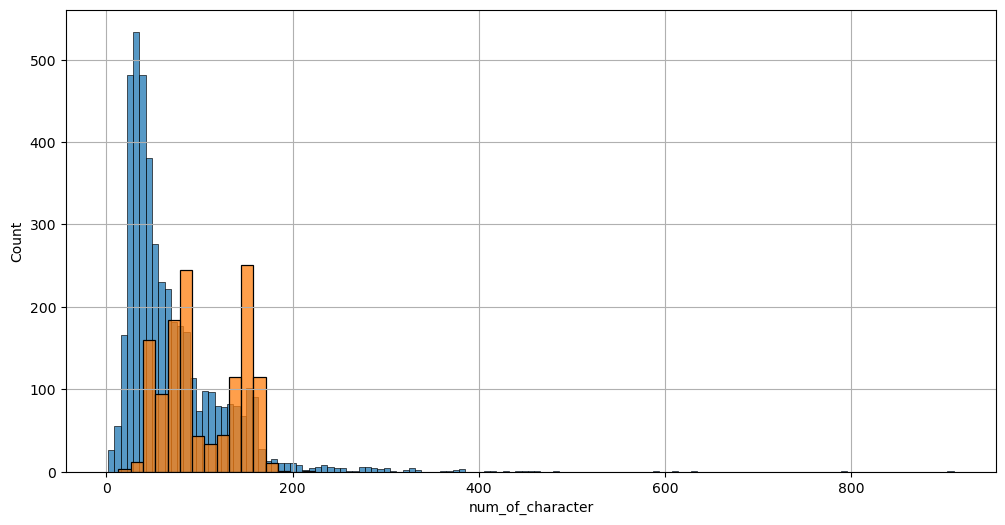

In [45]:
#Now see these conclusions by graphically
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_character'])
sns.histplot(df[df['target'] == 1]['num_of_character'])
plt.grid()

> As we see by graphicaly taget is depend on column (num_of_character)

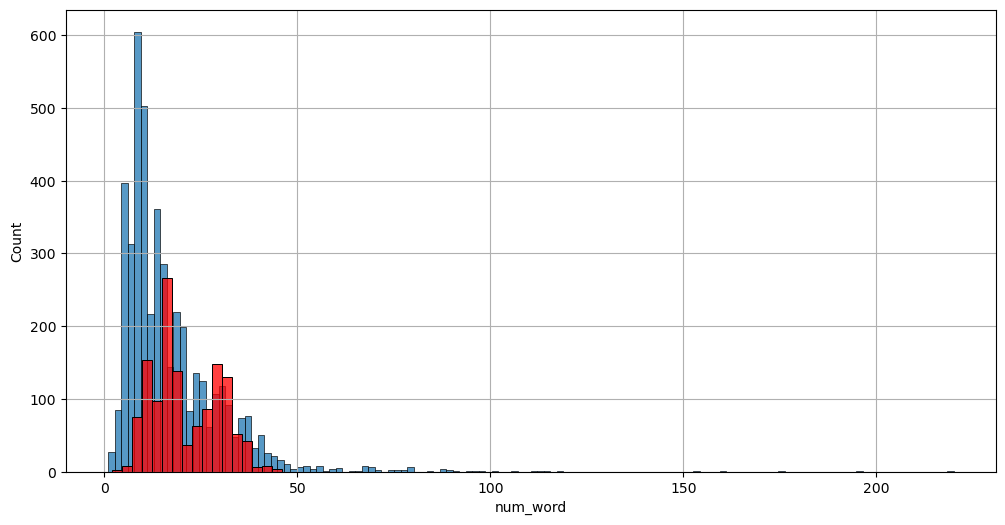

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')
plt.grid()

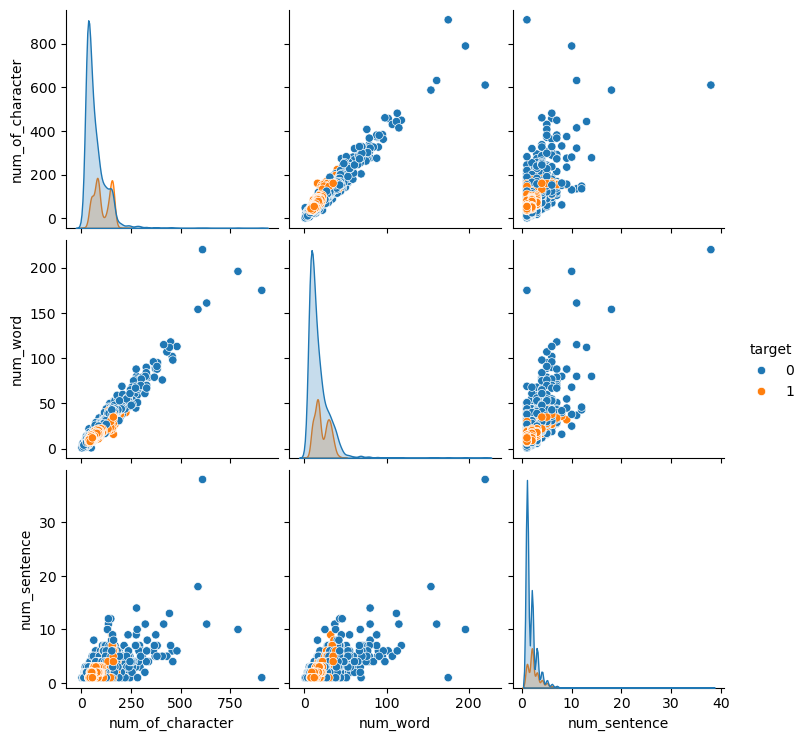

In [47]:
sns.pairplot(df,hue='target')
plt.grid()

<Axes: >

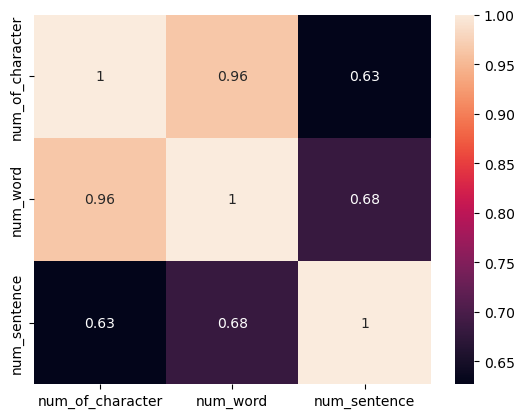

In [48]:
sns.heatmap(df[['num_of_character','num_word','num_sentence']].corr(),annot=True)

# **3. Data Preprocessing** 

* Lower Case
* Tokenization
* Removing Special Character
* Removing Stop words and punctuation
* Stemming

In [49]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    

In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
#For example how this function work actually...
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\anshu\AppData\Local\Temp\ipykernel_26716\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [54]:
df.head(5)

,target,text,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

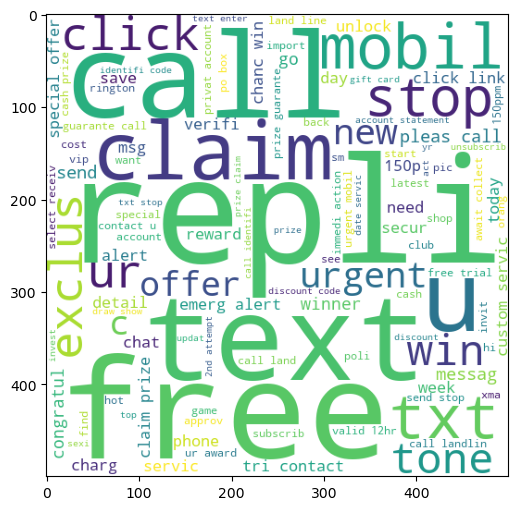

In [58]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [59]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

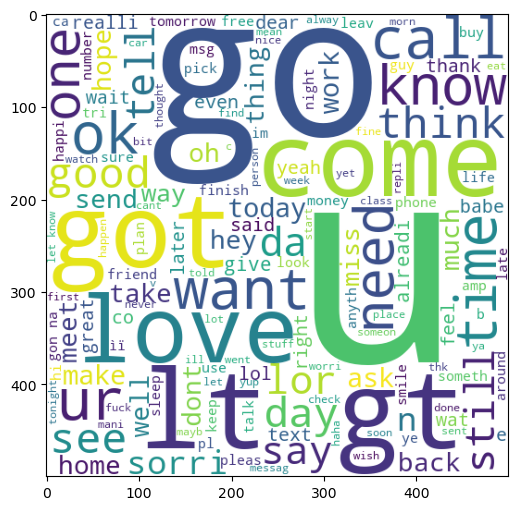

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# **4. Model Building**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [62]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
x.shape

(5827, 4000)

In [64]:
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
0.6625916870415648


In [70]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9802744425385935
0.996309963099631


In [71]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9768439108061749
0.9853479853479854


In [72]:
import pickle
pickle.dump(tfidf,open('nlp_vectorizer1.pkl','wb'))
pickle.dump(mnb,open('nlp_model1.pkl','wb'))

# **5. Testing**

In [73]:
pred = mnb.predict(x_test)

In [74]:
pred

array([1, 1, 1, ..., 0, 0, 0])

In [75]:
y_test

array([1, 1, 1, ..., 0, 0, 0])